In [1]:
# 1. 환경 설정 및 데이터 로드

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
DATA_PATH = '../data/1st_test/'

# 파일 목록 확인
files = sorted(os.listdir(DATA_PATH))
print(f"   총 파일 수: {len(files)}개")
print(f"   첫 파일: {files[0]}")
print(f"   마지막 파일: {files[-1]}")

# 파일명 = 측정 시간
start_time = files[0]
end_time = files[-1]
print(f"\n측정 기간:")
print(f"  시작: {start_time}")
print(f"  종료: {end_time}")

   총 파일 수: 2156개
   첫 파일: 2003.10.22.12.06.24
   마지막 파일: 2003.11.25.23.39.56

측정 기간:
  시작: 2003.10.22.12.06.24
  종료: 2003.11.25.23.39.56


In [2]:
# 2. 파일 구조 확인

# 첫 번째 파일 열어보기
first_file = files[0]
file_path = os.path.join(DATA_PATH, first_file)

# 파일 읽기 (탭 구분, 헤더 없음)
df_sample = pd.read_csv(file_path, sep='\t', header=None)

print(f"\n데이터 크기: {df_sample.shape}")
print(f"  행(샘플): {df_sample.shape[0]:,}개")
print(f"  열(베어링): {df_sample.shape[1]}개")

print(f"\n처음 10개 행:")
print(df_sample.head(10))

print(f"\n기본 통계:")
print(df_sample.describe())

# 컬럼 이름 지정 
df_sample.columns = ['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8']

print(f"\n컬럼 이름 지정 완료:")
print(df_sample.head())


데이터 크기: (20480, 8)
  행(샘플): 20,480개
  열(베어링): 8개

처음 10개 행:
       0      1      2      3      4      5      6      7
0 -0.022 -0.039 -0.183 -0.054 -0.105 -0.134 -0.129 -0.142
1 -0.105 -0.017 -0.164 -0.183 -0.049  0.029 -0.115 -0.122
2 -0.183 -0.098 -0.195 -0.125 -0.005 -0.007 -0.171 -0.071
3 -0.178 -0.161 -0.159 -0.178 -0.100 -0.115 -0.112 -0.078
4 -0.208 -0.129 -0.261 -0.098 -0.151 -0.205 -0.063 -0.066
5 -0.232 -0.061 -0.281 -0.125  0.046 -0.088 -0.078 -0.078
6 -0.112 -0.132 -0.181 -0.186 -0.132 -0.051 -0.132 -0.076
7 -0.054 -0.107 -0.173 -0.134 -0.164  0.002 -0.146 -0.125
8 -0.159 -0.032 -0.161 -0.181 -0.110 -0.044 -0.173 -0.137
9 -0.225 -0.044 -0.090 -0.159 -0.100 -0.151 -0.139 -0.076

기본 통계:
                  0            1             2             3             4  \
count  20480.000000  20480.00000  20480.000000  20480.000000  20480.000000   
mean      -0.094593     -0.09388     -0.093817     -0.093752     -0.090812   
std        0.081124      0.07065      0.090650      0.07751

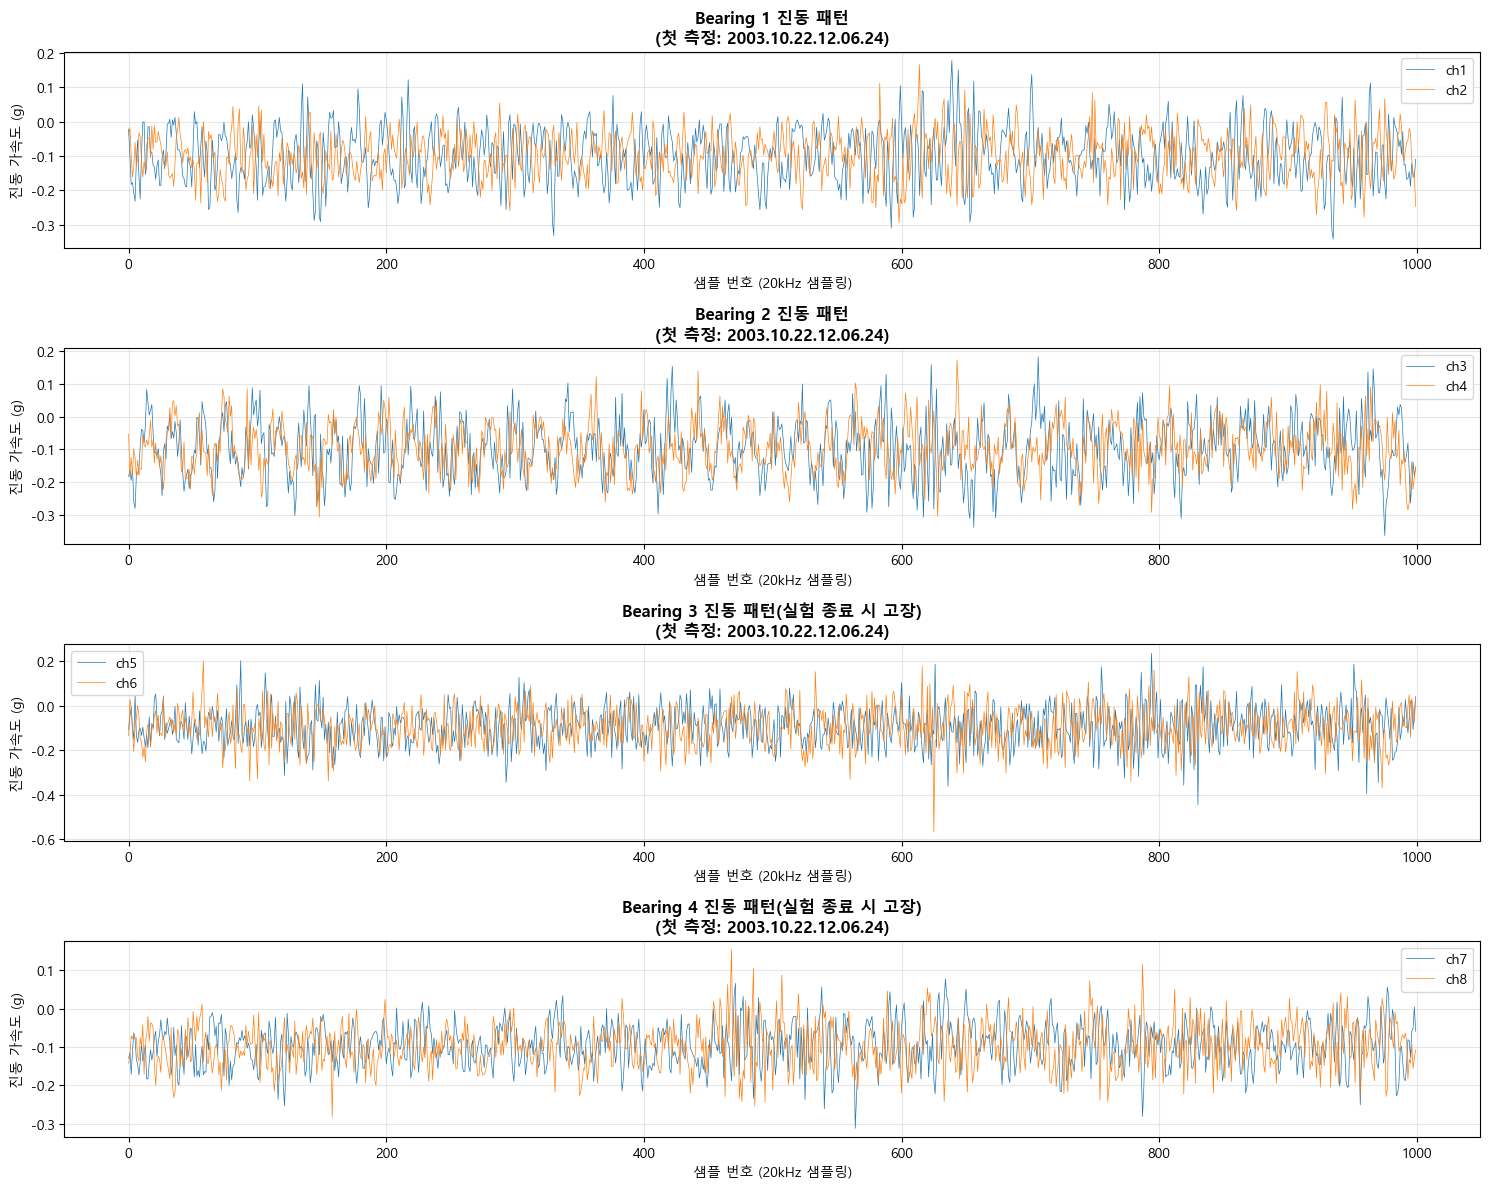

In [3]:
# 3. 진동 패턴 시각화

# 베어링별 채널 그룹화 (공식 문서 참고)
bearings = {
    'Bearing 1': ['ch1', 'ch2'],
    'Bearing 2': ['ch3', 'ch4'],
    'Bearing 3': ['ch5', 'ch6'],  # 내륜결함 (inner race fault)
    'Bearing 4': ['ch7', 'ch8']   # 롤러 요소 결함 (roller element fault)
}

# 시각화
# 한글
plt.rcParams['font.family'] = 'Malgun Gothic'
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

for idx, (bearing_name, channels) in enumerate(bearings.items()):
    ax = axes[idx]
    
    # 처음 1000개만 플롯 (전체 20,480개는 너무 많음)
    for ch in channels:
        ax.plot(df_sample[ch].iloc[:1000], label=ch, linewidth=0.5)
    
    # 고장 베어링 표시
    title = f'{bearing_name} 진동 패턴'
    if bearing_name in ['Bearing 3', 'Bearing 4']:
        title += '(실험 종료 시 고장)'
    
    ax.set_title(f'{title}\n(첫 측정: {first_file})', 
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('샘플 번호 (20kHz 샘플링)')
    ax.set_ylabel('진동 가속도 (g)')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


처리 중: 100%|██████████| 2156/2156 [01:20<00:00, 26.73it/s]


   데이터 크기: (2156, 9)

처음 5개:
                  file  bearing1_ch1  bearing1_ch2  bearing2_ch3  \
0  2003.10.22.12.06.24      0.124614      0.117493      0.130455   
1  2003.10.22.12.09.13      0.123811      0.116833      0.131490   
2  2003.10.22.12.14.13      0.125246      0.118384      0.131906   
3  2003.10.22.12.19.13      0.125197      0.119005      0.131614   
4  2003.10.22.12.24.13      0.125618      0.119688      0.130779   

   bearing2_ch4  bearing3_ch5  bearing3_ch6  bearing4_ch7  bearing4_ch8  
0      0.121642      0.128887      0.131821      0.109020      0.115267  
1      0.122182      0.129562      0.132049      0.108900      0.109208  
2      0.123572      0.131339      0.133300      0.110319      0.113696  
3      0.122750      0.131083      0.133969      0.111037      0.114413  
4      0.121866      0.131307      0.133281      0.110190      0.114258  


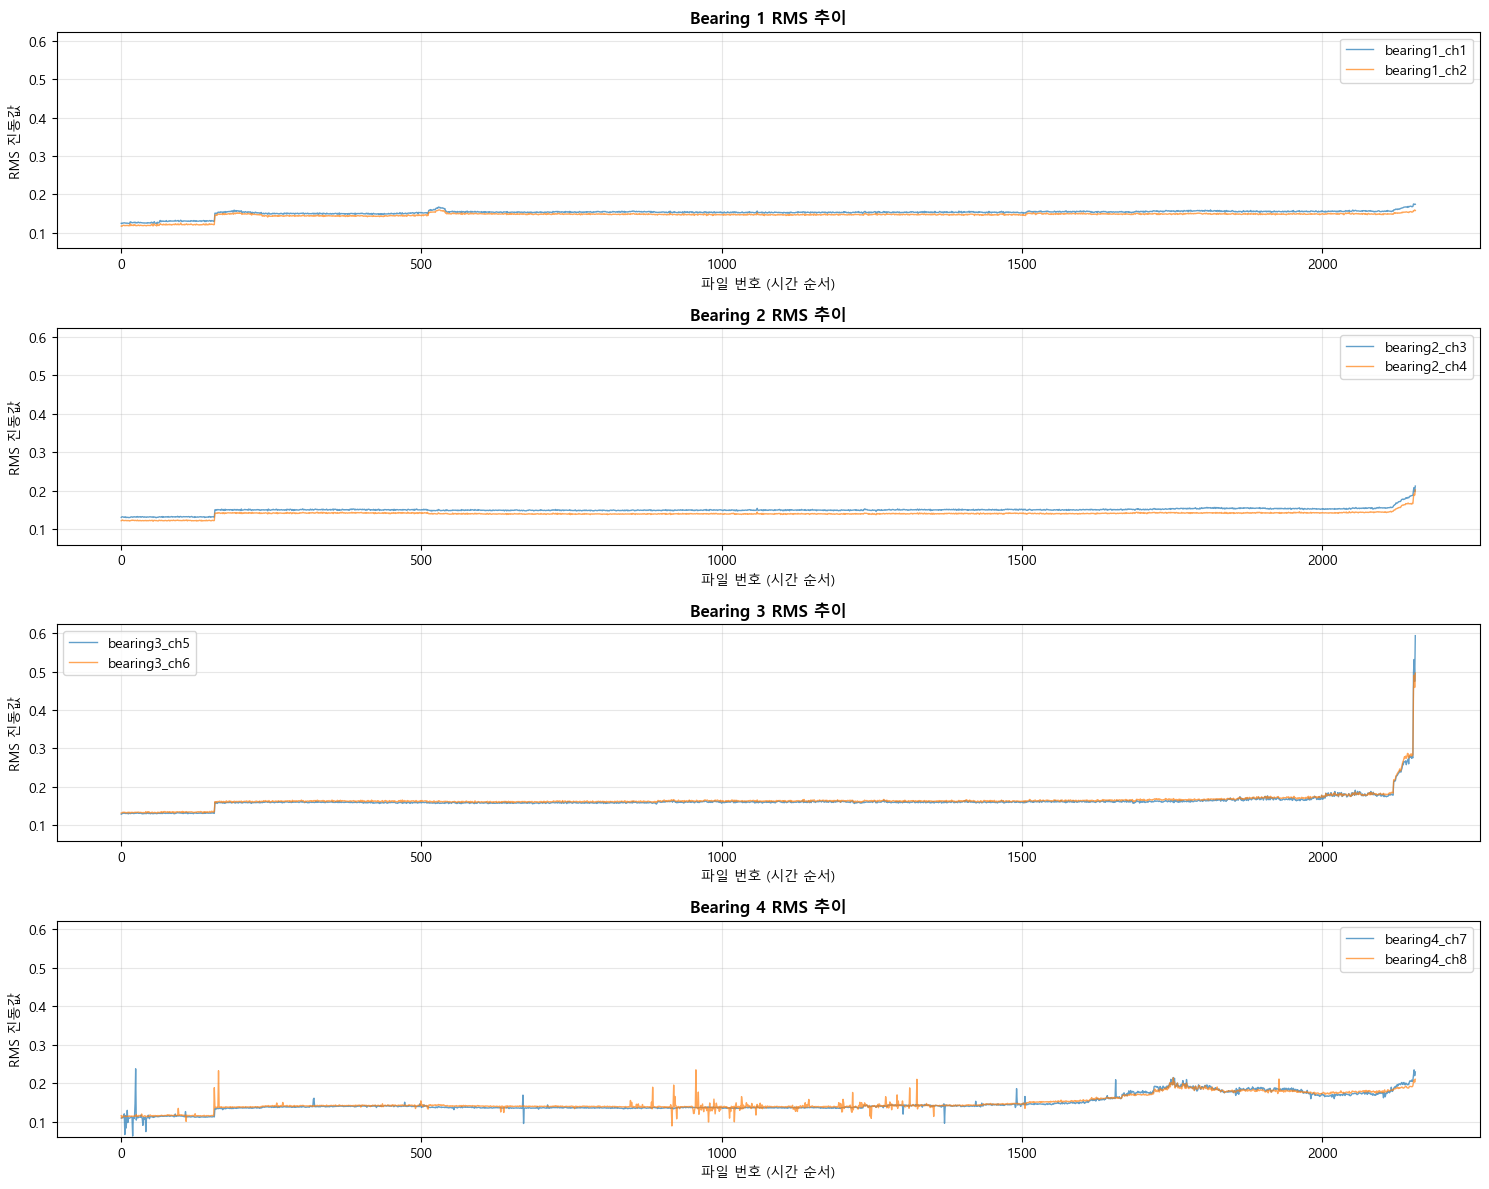


RMS 통계:
       bearing1_ch1  bearing1_ch2  bearing2_ch3  bearing2_ch4  bearing3_ch5  \
count   2156.000000   2156.000000   2156.000000   2156.000000   2156.000000   
mean       0.152221      0.145987      0.149490      0.139714      0.161843   
std        0.007184      0.007431      0.006739      0.006123      0.021728   
min        0.123811      0.116833      0.129423      0.120169      0.128887   
25%        0.152211      0.146428      0.148747      0.139266      0.158741   
50%        0.153733      0.147989      0.149825      0.140335      0.160172   
75%        0.155258      0.149095      0.151192      0.141778      0.162250   
max        0.174975      0.159507      0.211860      0.201597      0.593610   

       bearing3_ch6  bearing4_ch7  bearing4_ch8  
count   2156.000000   2156.000000   2156.000000  
mean       0.164638      0.146809      0.148647  
std        0.020355      0.021527      0.019971  
min        0.131718      0.062242      0.088488  
25%        0.161706      0.13

In [4]:
# 4. 전체 데이터 시간 흐름 확인

# 2,156개 파일 전체를 시간 순서로 분석
# ->각 베어링의 RMS(Root Mean Square) 진동 값 추이를 확인

# RMS 계산 함수
from tqdm import tqdm


def calculate_rms(series):
    # RMS(제곱평균제곱근) 계산
    return np.sqrt(np.mean(series**2))

# 전체 파일에 대해 RMS 계산
rms_data = []

for file in tqdm(files, desc="처리 중"):
    file_path = os.path.join(DATA_PATH, file)
    df_temp = pd.read_csv(file_path, sep='\t', header=None)
    df_temp.columns = ['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8']
    
    # 각 채널의 RMS 계산
    rms_row = {
        'file': file,
        'bearing1_ch1': calculate_rms(df_temp['ch1']),
        'bearing1_ch2': calculate_rms(df_temp['ch2']),
        'bearing2_ch3': calculate_rms(df_temp['ch3']),
        'bearing2_ch4': calculate_rms(df_temp['ch4']),
        'bearing3_ch5': calculate_rms(df_temp['ch5']),
        'bearing3_ch6': calculate_rms(df_temp['ch6']),
        'bearing4_ch7': calculate_rms(df_temp['ch7']),
        'bearing4_ch8': calculate_rms(df_temp['ch8'])
    }
    rms_data.append(rms_row)

# DataFrame으로 변환
df_rms = pd.DataFrame(rms_data)

print(f"   데이터 크기: {df_rms.shape}")
print(f"\n처음 5개:")
print(df_rms.head())

# 시각화: 베어링별 RMS 추이
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# 베어링별 채널 그룹
bearing_channels = {
    'Bearing 1': ['bearing1_ch1', 'bearing1_ch2'],
    'Bearing 2': ['bearing2_ch3', 'bearing2_ch4'],
    'Bearing 3': ['bearing3_ch5', 'bearing3_ch6'],  # 고장
    'Bearing 4': ['bearing4_ch7', 'bearing4_ch8']   # 고장
}

# x축: 파일 인덱스 (시간 순서)
x = range(len(df_rms))

all_rms_values = df_rms[[ch for channels in bearing_channels.values() 
                          for ch in channels]].values.flatten()
y_min = all_rms_values.min() * 0.95
y_max = all_rms_values.max() * 1.05

for idx, (bearing_name, channels) in enumerate(bearing_channels.items()):
    ax = axes[idx]
    
    for ch in channels:
        ax.plot(x, df_rms[ch], label=ch, linewidth=1, alpha=0.7)
    
    ax.set_title(f'{bearing_name} RMS 추이', 
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('파일 번호 (시간 순서)')
    ax.set_ylabel('RMS 진동값')
    ax.legend()
    ax.grid(True, alpha=0.3)

    ax.set_ylim(y_min, y_max) # y축 범위 통일
    
    # 고장 베어링 배경색
    if '⚠️' in bearing_name:
        ax.set_facecolor('#fff5f5')
        

plt.tight_layout()
plt.show()

# 기본 통계
print("\nRMS 통계:")
print(df_rms.describe())

# 결론: 3번 베어링 진동률 급증가, 4번 베어링 점진적 증가 및 불안정한 패턴 확인

처리 중: 100%|██████████| 2156/2156 [01:06<00:00, 32.23it/s]


   데이터 크기: (2156, 33)
   컬럼 수: 33개

처음 5개:
                  file   ch1_rms  ch1_peak   ch1_std  ch1_kurtosis
0  2003.10.22.12.06.24  0.124614     0.720  0.081122      1.069717
1  2003.10.22.12.09.13  0.123811     0.654  0.079515      1.162128
2  2003.10.22.12.14.13  0.125246     0.623  0.080217      0.986819
3  2003.10.22.12.19.13  0.125197     0.598  0.080825      1.034839
4  2003.10.22.12.24.13  0.125618     0.623  0.082034      1.110728


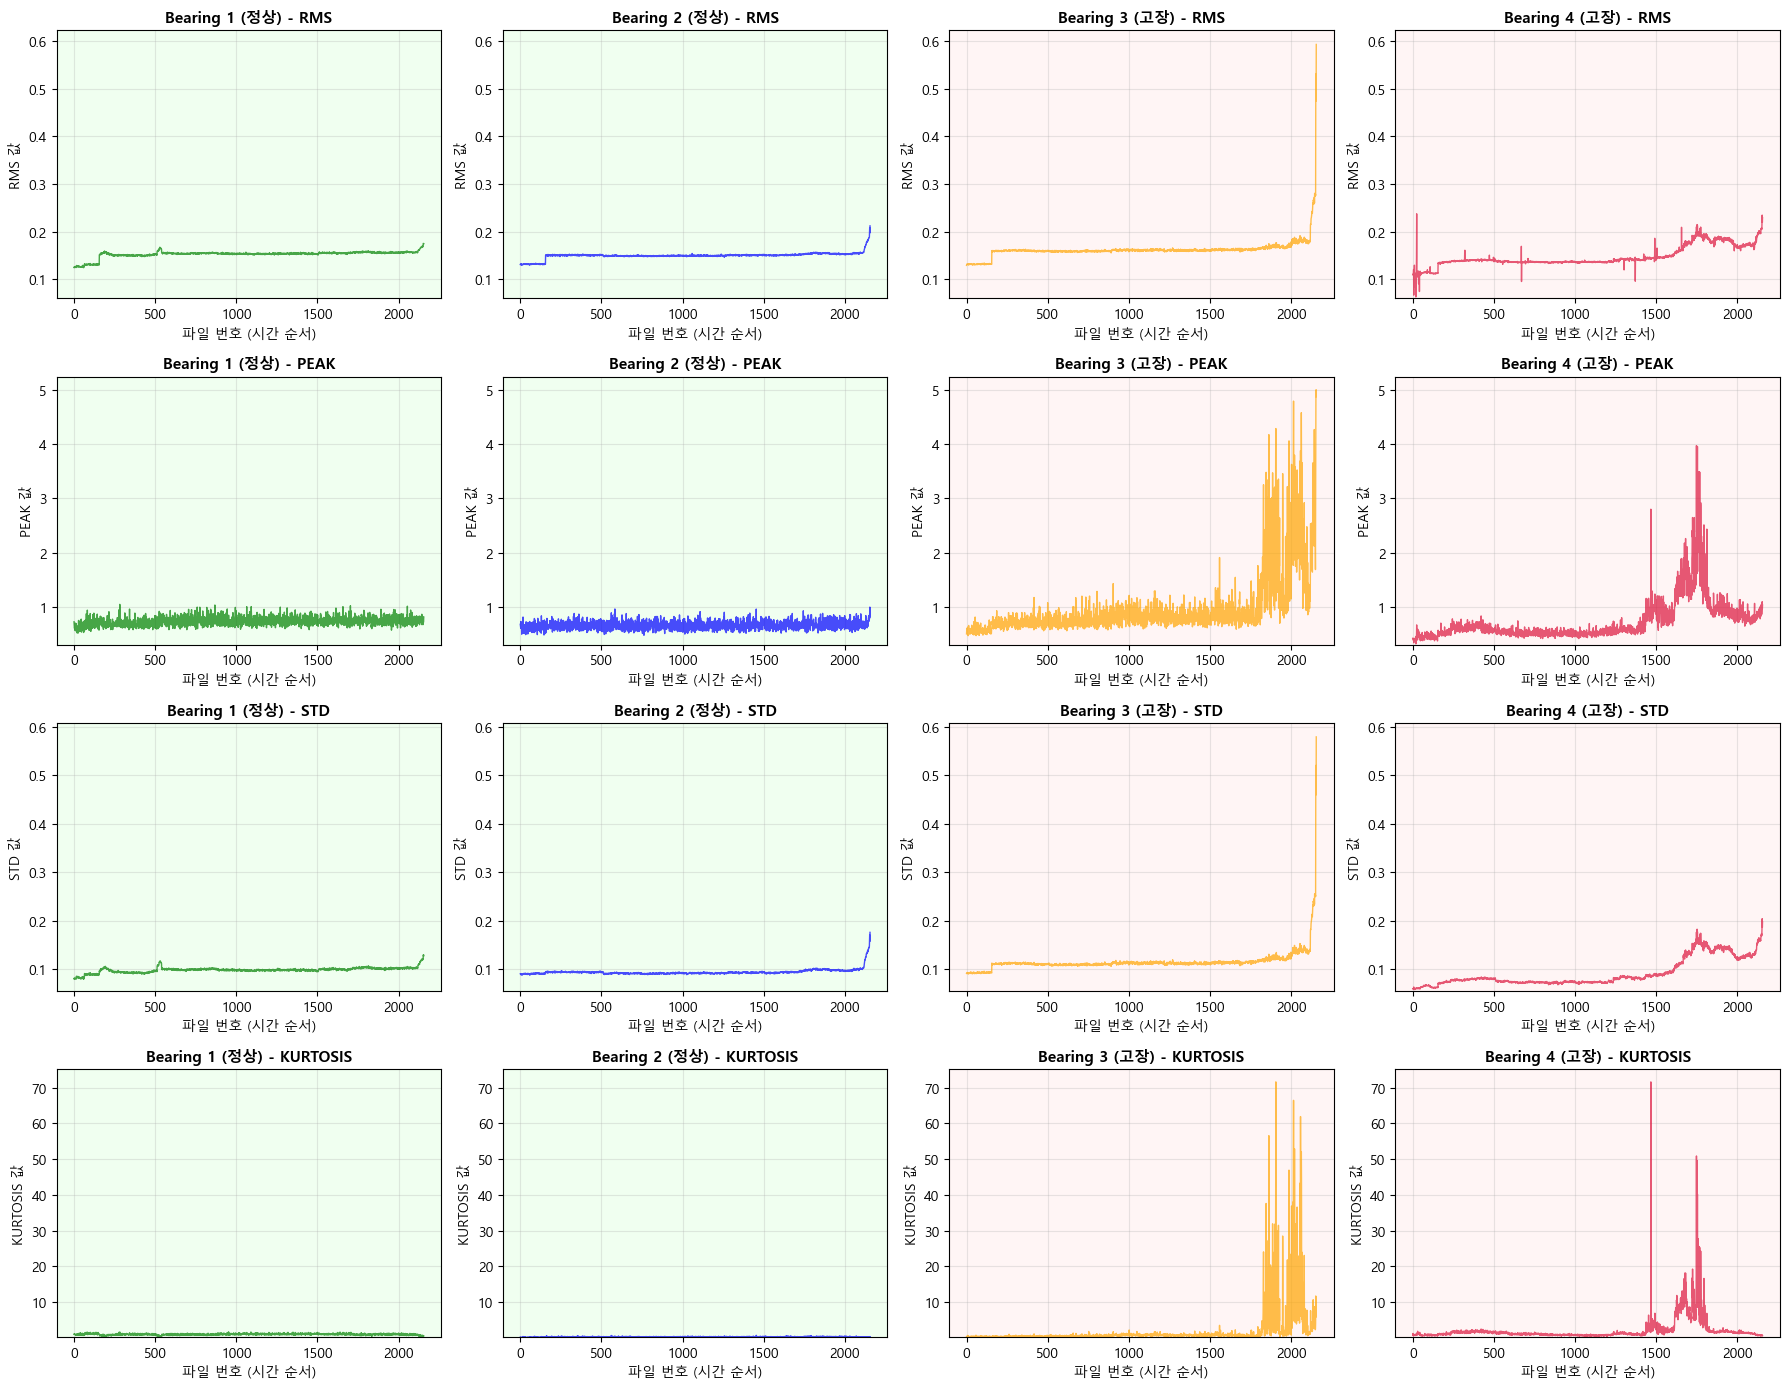

   RMS: 0.059 ~ 0.623
   PEAK: 0.296 ~ 5.250
   STD: 0.055 ~ 0.608
   KURTOSIS: 0.196 ~ 75.159


In [ ]:
# 5. 통계적 특성 추출 (RMS, Peak, Std 등)

# 통계 함수들
def calculate_peak(series):
    #최대 절대값
    return np.max(np.abs(series))

def calculate_std(series):
    #표준편차
    return np.std(series)

def calculate_kurtosis(series):
    #첨도 (뾰족한 정도, 충격 감지)
    return series.kurtosis()

# 전체 파일에 대해 통계 계산
stats_data = []

for file in tqdm(files, desc="처리 중"):
    file_path = os.path.join(DATA_PATH, file)
    df_temp = pd.read_csv(file_path, sep='\t', header=None)
    df_temp.columns = ['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8']
    
    stats_row = {'file': file}
    
    # 각 채널마다 4가지 통계 계산
    for ch in df_temp.columns:
        stats_row[f'{ch}_rms'] = calculate_rms(df_temp[ch])
        stats_row[f'{ch}_peak'] = calculate_peak(df_temp[ch])
        stats_row[f'{ch}_std'] = calculate_std(df_temp[ch])
        stats_row[f'{ch}_kurtosis'] = calculate_kurtosis(df_temp[ch])
    
    stats_data.append(stats_row)

# DataFrame으로 변환
df_stats = pd.DataFrame(stats_data)

print(f"   데이터 크기: {df_stats.shape}")
print(f"   컬럼 수: {len(df_stats.columns)}개") # 33 => 1(file) + 8채널*4통계=32

print(f"\n처음 5개:")
print(df_stats.iloc[:5, :5])

# 시각화: 정상 vs 고장 비교

fig, axes = plt.subplots(4, 4, figsize=(18, 14))

# 비교할 베어링
channels_to_plot = {
    'Bearing 1 (정상)': 'ch1',
    'Bearing 2 (정상)': 'ch3',
    'Bearing 3 (고장)': 'ch5',
    'Bearing 4 (고장)': 'ch7'
}

stats_list = ['rms', 'peak', 'std', 'kurtosis']
stats_colors = {
    'ch1': 'green',
    'ch3': 'blue',
    'ch5': 'orange',
    'ch7': 'crimson'
}

x = range(len(df_stats))

# 각 통계별 Y축 범위 계산
y_ranges = {}
for stat in stats_list:
    all_values = []
    for ch in ['ch1', 'ch5', 'ch7']:
        all_values.extend(df_stats[f'{ch}_{stat}'].values)
    y_min = min(all_values) * 0.95
    y_max = max(all_values) * 1.05
    y_ranges[stat] = (y_min, y_max)

for col_idx, (bearing_name, ch) in enumerate(channels_to_plot.items()):
    for row_idx, stat in enumerate(stats_list):
        ax = axes[row_idx, col_idx]
        
        col_name = f'{ch}_{stat}'
        color = stats_colors[ch]
        
        ax.plot(x, df_stats[col_name], linewidth=1, color=color, alpha=0.7)
        
        ax.set_title(f'{bearing_name} - {stat.upper()}', 
                     fontsize=11, fontweight='bold')
        ax.set_xlabel('파일 번호 (시간 순서)')
        ax.set_ylabel(f'{stat.upper()} 값')
        ax.grid(True, alpha=0.3)
        
        # ⭐ Y축 범위 통일
        ax.set_ylim(y_ranges[stat])
        
        # 배경색
        if '정상' in bearing_name:
            ax.set_facecolor('#f0fff0')
        else:
            ax.set_facecolor('#fff5f5')

plt.tight_layout()
plt.show()

# Y축 범위 출력
for stat, (y_min, y_max) in y_ranges.items():
    print(f"   {stat.upper()}: {y_min:.3f} ~ {y_max:.3f}")

# 결론: 3,4번 베어링 모두 후반에 튀는 구간이 존재

In [13]:
# 6. 시간에 따른 변화 추이 (날짜 변환)

# 파일명을 datetime으로 변환
df_stats['timestamp'] = pd.to_datetime(df_stats['file'], format='%Y.%m.%d.%H.%M.%S')

# 시작 시간과 종료 시간
start_time = df_stats['timestamp'].min()
end_time = df_stats['timestamp'].max()
duration = end_time - start_time

print(f"시작: {start_time}")
print(f"종료: {end_time}")
print(f"기간: {duration.days}일 {duration.seconds//3600}시간")

# 고장까지 남은 시간 계산 (역순)
df_stats['time_to_failure'] = (end_time - df_stats['timestamp']).dt.total_seconds() / 3600  # 시간 단위
df_stats['days_to_failure'] = df_stats['time_to_failure'] / 24  # 일 단위

print(f"\n처음 5개:")
print(df_stats[['file', 'timestamp', 'days_to_failure']].head())

print(f"\n마지막 5개:")
print(df_stats[['file', 'timestamp', 'days_to_failure']].tail())

시작: 2003-10-22 12:06:24
종료: 2003-11-25 23:39:56
기간: 34일 11시간

처음 5개:
                  file           timestamp  days_to_failure
0  2003.10.22.12.06.24 2003-10-22 12:06:24        34.481620
1  2003.10.22.12.09.13 2003-10-22 12:09:13        34.479664
2  2003.10.22.12.14.13 2003-10-22 12:14:13        34.476192
3  2003.10.22.12.19.13 2003-10-22 12:19:13        34.472720
4  2003.10.22.12.24.13 2003-10-22 12:24:13        34.469248

마지막 5개:
                     file           timestamp  days_to_failure
2151  2003.11.25.16.07.32 2003-11-25 16:07:32         0.314167
2152  2003.11.25.23.13.21 2003-11-25 23:13:21         0.018461
2153  2003.11.25.23.19.56 2003-11-25 23:19:56         0.013889
2154  2003.11.25.23.29.56 2003-11-25 23:29:56         0.006944
2155  2003.11.25.23.39.56 2003-11-25 23:39:56         0.000000



전체 Peak 통계:
   평균: 0.768
   표준편차: 0.380
   공통 위험 기준: 1.529
   Y축 범위: 0.296 ~ 5.250
Bearing 1 (정상)      : 위험 신호 없음
Bearing 2 (정상)      : 위험 신호 없음
Bearing 3 (고장)      : D-  5.3일부터 위험
Bearing 4 (고장)      : D-  6.3일부터 위험


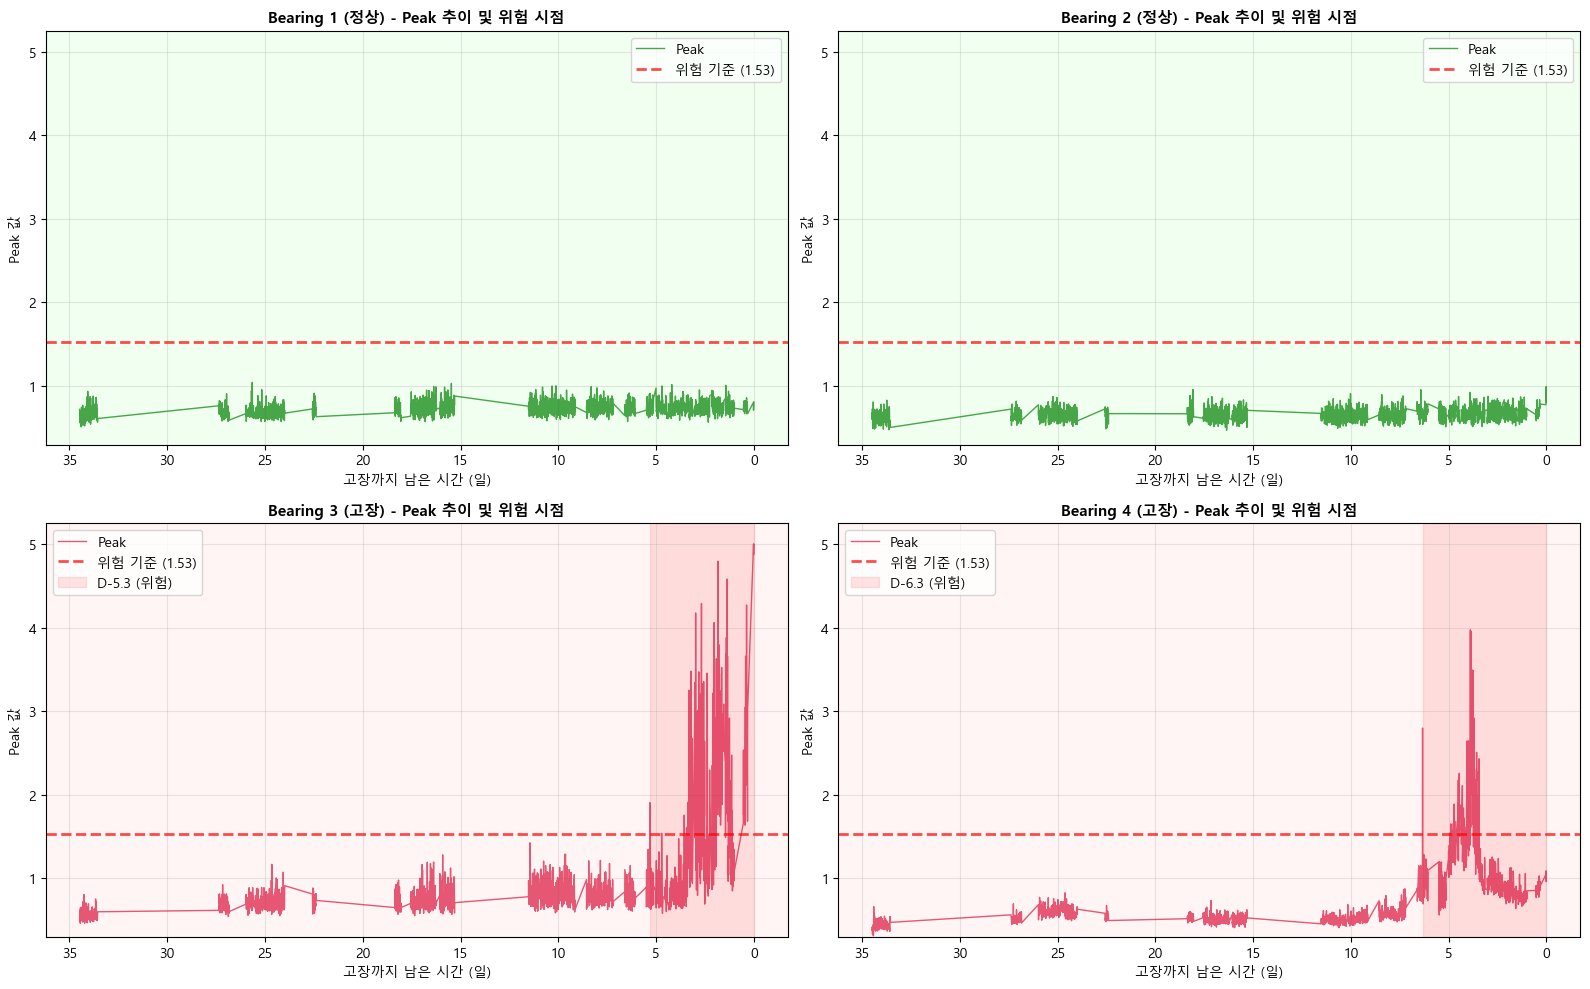


공통 위험 기준: Peak > 1.529

정상 베어링 (1, 2):
  - Bearing 1 (정상): 위험 신호 없음
  - Bearing 2 (정상): 위험 신호 없음

고장 베어링 (3, 4):
  - Bearing 3 (고장): D-5.3일부터 위험 신호
  - Bearing 4 (고장): D-6.3일부터 위험 신호


In [14]:
# 7. 위험 시점 분석 (Peak 기준)

# 분석할 베어링과 통계
bearings_info = {
    'Bearing 1 (정상)': 'ch1',
    'Bearing 2 (정상)': 'ch3',
    'Bearing 3 (고장)': 'ch5',
    'Bearing 4 (고장)': 'ch7'
}

# 전체 베어링의 Peak 값으로 공통 기준 계산
all_peak_values = []
for ch in bearings_info.values():
    all_peak_values.extend(df_stats[f'{ch}_peak'].values)

# 전체 기준: 평균 + 2*표준편차
all_peak_array = np.array(all_peak_values)
global_threshold = all_peak_array.mean() + 2 * all_peak_array.std()

print(f"\n전체 Peak 통계:")
print(f"   평균: {all_peak_array.mean():.3f}")
print(f"   표준편차: {all_peak_array.std():.3f}")
print(f"   공통 위험 기준: {global_threshold:.3f}")

# Y축 범위 계산
y_min = all_peak_array.min() * 0.95
y_max = all_peak_array.max() * 1.05

print(f"   Y축 범위: {y_min:.3f} ~ {y_max:.3f}")

# 위험 시점 저장
danger_times = {}

for bearing_name, ch in bearings_info.items():
    peak_col = f'{ch}_peak'
    
    # 공통 기준 초과 시점
    danger_data = df_stats[df_stats[peak_col] > global_threshold]
    
    if len(danger_data) > 0:
        first_danger = danger_data['days_to_failure'].max()
        danger_times[bearing_name] = first_danger
        print(f"{bearing_name:20s}: D-{first_danger:5.1f}일부터 위험")
    else:
        danger_times[bearing_name] = None
        print(f"{bearing_name:20s}: 위험 신호 없음")

# 시각화: 4개 베어링 비교 (Y축 통일)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for idx, (bearing_name, ch) in enumerate(bearings_info.items()):
    ax = axes[idx // 2, idx % 2]
    
    # Peak 추이
    x = df_stats['days_to_failure']
    y = df_stats[f'{ch}_peak']
    
    # 색상
    color = 'green' if '정상' in bearing_name else 'crimson'
    
    ax.plot(x, y, linewidth=1, color=color, alpha=0.7, label='Peak')
    
    # 공통 위험 기준선
    ax.axhline(y=global_threshold, color='red', linestyle='--', 
               linewidth=2, alpha=0.7, label=f'위험 기준 ({global_threshold:.2f})')
    
    # 위험 시점 표시
    if danger_times.get(bearing_name):
        danger_day = danger_times[bearing_name]
        ax.axvspan(0, danger_day, alpha=0.1, color='red', 
                   label=f'D-{danger_day:.1f} (위험)')
    
    ax.set_title(f'{bearing_name} - Peak 추이 및 위험 시점', 
                 fontsize=11, fontweight='bold')
    ax.set_xlabel('고장까지 남은 시간 (일)')
    ax.set_ylabel('Peak 값')
    ax.grid(True, alpha=0.3)
    ax.invert_xaxis()
    
    # Y축 통일
    ax.set_ylim(y_min, y_max)
    
    ax.legend()
    
    # 배경색
    if '정상' in bearing_name:
        ax.set_facecolor('#f0fff0')
    else:
        ax.set_facecolor('#fff5f5')

plt.tight_layout()
plt.show()

print(f"\n공통 위험 기준: Peak > {global_threshold:.3f}")

print("\n정상 베어링 (1, 2):")
for bearing_name in ['Bearing 1 (정상)', 'Bearing 2 (정상)']:
    if danger_times.get(bearing_name):
        print(f"  - {bearing_name}: D-{danger_times[bearing_name]:.1f}일 (외부 영향)")
    else:
        print(f"  - {bearing_name}: 위험 신호 없음")

print("\n고장 베어링 (3, 4):")
for bearing_name in ['Bearing 3 (고장)', 'Bearing 4 (고장)']:
    if danger_times.get(bearing_name):
        print(f"  - {bearing_name}: D-{danger_times[bearing_name]:.1f}일부터 위험 신호")
    else:
        print(f"  - {bearing_name}: 데이터 없음")

In [15]:
# 8. 데이터 저장

# 저장 경로
save_path = '../data/processed_features.csv'

# CSV 저장
df_stats.to_csv(save_path, index=False)

print(f"저장 완료: {save_path}")
print(f"크기: {df_stats.shape}")

저장 완료: ../data/processed_features.csv
크기: (2156, 36)


---

# 📋 01_data_exploration 요약

## ✅ 완료된 작업

1. **데이터 로드 및 구조 확인**
   - 2,156개 파일 (34일간 측정)
   - 8개 채널 진동 데이터
   - 각 파일당 20,480개 샘플

2. **진동 패턴 확인**
   - 각 베어링별 진동 파형 시각화
   - Bearing 1, 2 vs 3, 4 초기 비교

3. **전체 시간 흐름 분석**
   - 2,156개 파일의 RMS 추이
   - Y축 통일로 베어링 간 비교
   - Bearing 3, 4가 시작부터 높은 진동

4. **통계 특성 추출**
   - **RMS** (평균 진동)
   - **Peak** (최대 진동)
   - **Std** (변동성)
   - **Kurtosis** (충격)
   - 총 32개 특성 생성 (8채널 × 4통계)

5. **정상 vs 고장 비교**
   - Y축 통일 후 명확한 차이 확인
   - Kurtosis가 가장 민감하게 고장 감지
   - Peak도 고장 직전 급증

6. **시간 변환 및 D-day 분석**
   - 파일명 → datetime 변환
   - 고장까지 남은 시간 계산
   - 역순 카운트다운

7. **위험 시점 자동 분석**
   - 공통 기준선 적용 (평균 + 2σ)
   - Bearing 1, 2: 위험 신호 없음
   - Bearing 3, 4: 고장 며칠 전부터 위험

8. **데이터 저장**
   - `processed_features.csv` 생성
   - 다음 노트북에서 사용

---

## 주요 발견

### **Bearing 1, 2 (정상)**
- RMS: 낮고 안정적 (0.10~0.17)
- Peak: 변동 적음
- Std: 일정
- Kurtosis: 거의 일자 (충격 없음)
- **결론: 전체 기간 정상**

### **Bearing 3 (내륜 결함)**
- RMS: 시작부터 높음 (0.13~0.20)
- Peak: 후반에 급증
- Std: 후반에 크게 튐
- Kurtosis: 충격 발생
- **결론: 서서히 악화 → 후반 급격히 악화**

### **Bearing 4 (롤러 결함)**
- RMS: 시작부터 불안정
- Peak: 지속적 스파이크
- Std: 높은 변동성
- Kurtosis: 자주 튐
- **결론: 처음부터 끝까지 불안정**

---

## 고장 감지 특성 순위

| 순위 | 특성 | 설명 | 고장 감지 능력 |
|------|------|------|----------------|
| 1 | **Kurtosis** | 충격, 첨도 | ⭐⭐⭐ 가장 민감 |
| 2 | **Peak** | 최대 진동 | ⭐⭐⭐ 고장 직전 급증 |
| 3 | **Std** | 변동성 | ⭐⭐ 불규칙성 감지 |
| 4 | **RMS** | 평균 진동 | ⭐ 전체 경향 |

**결론:** 4가지를 조합하면 가장 정확한 예측 가능

---

## 💡 인사이트

### **1. Y축 통일의 중요성**
- Y축 제각각 → Bearing 3이 안정적으로 보임
- Y축 통일 → Bearing 3이 시작부터 비정상

### **2. 단일 지표의 한계**
- RMS만 → 차이 불명확
- 4가지 조합 → 명확한 패턴

### **3. 시간 정보의 중요성**
- 파일 번호 → 추세 파악 어려움
- D-day 변환 → "고장까지 며칠" 명확

### **4. 자동 기준의 필요성**
- 수동 기준 (D-7) → 임의적
- 통계 기준 (평균+2σ) → 객관적

---

**processed_features.csv:**
- 행: 2,156개
- 열: 35개 (file, timestamp, days_to_failure + 32개 특성)

---

## 다음 단계

**02_baseline_lstm.ipynb**에서:

1. `processed_features.csv` 불러오기
2. 정상/고장 라벨 생성
   - Bearing 1, 2 데이터 → 정상 (0)
   - Bearing 3, 4 데이터 → 고장 (1)
3. 시계열 윈도우 생성
   - 예: [D-10 ~ D-1] → [D-0 고장 여부]
4. LSTM 모델 학습
5. 고장 예측 성능 평가

---

## 기억할 것

- **특성 추출이 핵심**: 20,480개 → 4개 통계
- **시간 순서 중요**: 과거 패턴으로 미래 예측
- **4가지 통계 조합**: 단일 지표보다 훨씬 정확
- **정상 데이터 필요**: 비교 기준

---